# TP 4

Autor: Baldezzari Lucas

#### Librerias a utilizar

In [1]:
import pandas as pd
from pandas_profiling import ProfileReport

import numpy as np
from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt

#### Carga de sets

In [2]:
trainset = pd.read_csv('train.csv')
testset = pd.read_csv('test.csv')

trainset

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [3]:
trainset.columns, trainset.shape, trainset.shape

(Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
        'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
        'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
        'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
        'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
        'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
        'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
        'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
        'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
        'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
        'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
        'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
        'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
        'GarageCond

In [4]:
trainset.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


#### Analizando datos con ProfileReport

In [5]:
prifiledataTrainset = ProfileReport(trainset, title = "Reporte datos de entrenamiento", interactions=None)
#prifiledataTrainset

#### Missing values

Con la herramienta ProfileReport es posible notar que algunas columnas parecen tener datos perdidos. No obstante, analizando _data_description.txt_ es posible ver que muchos datos fueron registrados con las letras _NA_.

Las variables que toman valores _NA_ son,

- Alley
- BsmtQual
- BsmtCond
- BsmtExposure
- BsmtFinType1
- BsmtFinType2
- FireplaceQu
- GarageType
- GarageFinish
- GarageQual
- GarageCond
- PoolQC
- Fence
- MiscFeature

Utilizando el método propuesto en clases se corrigen estas columnas.

In [6]:
trainset.PoolQC

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
1455    NaN
1456    NaN
1457    NaN
1458    NaN
1459    NaN
Name: PoolQC, Length: 1460, dtype: object

In [7]:
# Función auxiliar para convertir valores
def NA2None(cell):
    if cell == "NA":
        return "None"
    
NA_converter = {"Alley": NA2None, "BsmtQual": NA2None, "BsmtCond": NA2None,"BsmtExposure": NA2None,"BsmtFinType1": NA2None,
                "BsmtFinType2": NA2None,"FireplaceQu": NA2None,"GarageType": NA2None,"GarageFinish": NA2None,"GarageQual": NA2None,
               "GarageCond": NA2None, "PoolQC": NA2None, "Fence": NA2None, "MiscFeature": NA2None}

trainset = pd.read_csv('train.csv', converters=NA_converter) 
testset = pd.read_csv('test.csv', converters=NA_converter) 

In [8]:
trainset.PoolQC

0       None
1       None
2       None
3       None
4       None
        ... 
1455    None
1456    None
1457    None
1458    None
1459    None
Name: PoolQC, Length: 1460, dtype: object

### Revisión de algunos datos

A continuación realizaré la revisión de algunas de las variables del set de entrenamiento para poder seleccionar algunas como mis features.

<AxesSubplot:title={'center':'2ndFlrSF vs SalePrice'}, xlabel='2ndFlrSF', ylabel='SalePrice'>

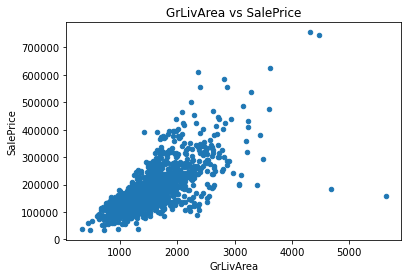

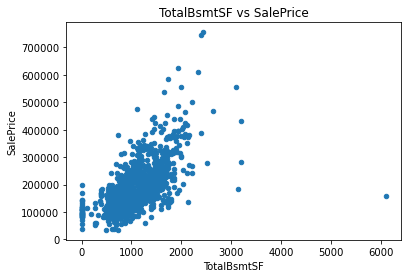

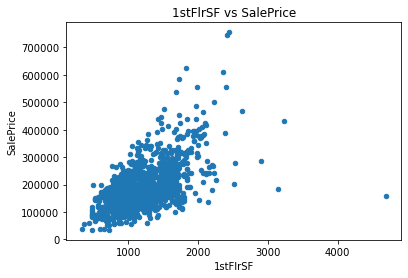

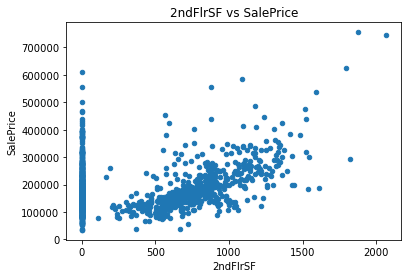

In [9]:
#Analizando variables de áreas construidas

trainset.plot.scatter(x="GrLivArea", y="SalePrice", title = "GrLivArea vs SalePrice")
trainset.plot.scatter(x="TotalBsmtSF", y="SalePrice", title ="TotalBsmtSF vs SalePrice")

trainset.plot.scatter(x="1stFlrSF", y="SalePrice", title ="1stFlrSF vs SalePrice")
trainset.plot.scatter(x="2ndFlrSF", y="SalePrice", title ="2ndFlrSF vs SalePrice")

<AxesSubplot:title={'center':'2ndFlrSF vs SalePrice (con filtro)'}, xlabel='2ndFlrSF', ylabel='SalePrice'>

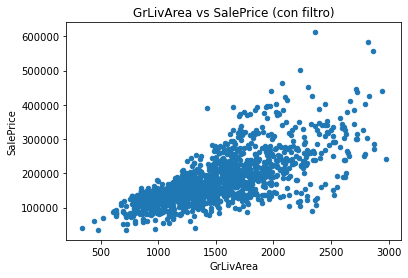

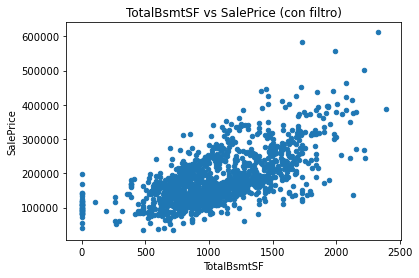

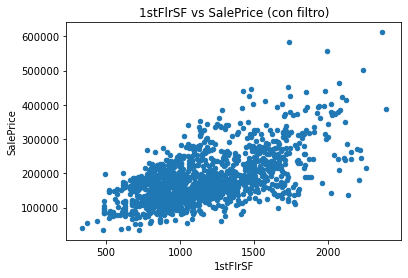

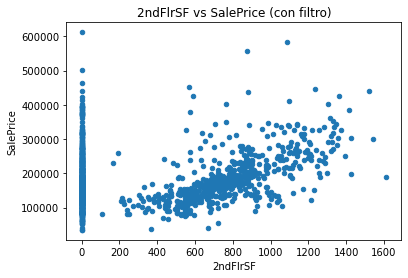

In [10]:
#Retirando outlayers

filtro = (trainset.GrLivArea <= 3000)
trainset = trainset.loc[filtro]

filtro = (trainset.TotalBsmtSF <= 3000)
trainset = trainset.loc[filtro]

filtro = (trainset["1stFlrSF"] <= 2500)
trainset = trainset.loc[filtro]

filtro = (trainset["2ndFlrSF"] <= 1800)
trainset = trainset.loc[filtro]

trainset.plot.scatter(x="GrLivArea", y="SalePrice", title = "GrLivArea vs SalePrice (con filtro)")
trainset.plot.scatter(x="TotalBsmtSF", y="SalePrice", title ="TotalBsmtSF vs SalePrice (con filtro)")

trainset.plot.scatter(x="1stFlrSF", y="SalePrice", title ="1stFlrSF vs SalePrice (con filtro)")
trainset.plot.scatter(x="2ndFlrSF", y="SalePrice", title ="2ndFlrSF vs SalePrice (con filtro)")

Podemos notar cierta relación lineal entre la cantidad de pies cuadradoes y el precio de cada casa.

A cotinuación voy a sumar las áreas construidas de cada casa en una sola variable.

In [11]:
trainset["totalArea"] =  trainset.GrLivArea + trainset.TotalBsmtSF + trainset["1stFlrSF"] + trainset["2ndFlrSF"]

trainset["totalArea"]

0       4276
1       3786
2       4492
3       4190
4       5541
        ... 
1455    4247
1456    5688
1457    5832
1458    3234
1459    3768
Name: totalArea, Length: 1436, dtype: int64

<AxesSubplot:title={'center':'totalArea vs SalePrice'}, xlabel='totalArea', ylabel='SalePrice'>

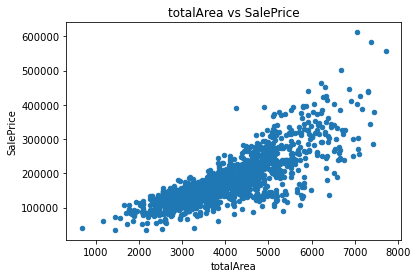

In [13]:
trainset.plot.scatter(x="totalArea", y="SalePrice", title = "totalArea vs SalePrice")

<AxesSubplot:title={'center':'HalfBath vs SalePrice'}, xlabel='HalfBath', ylabel='SalePrice'>

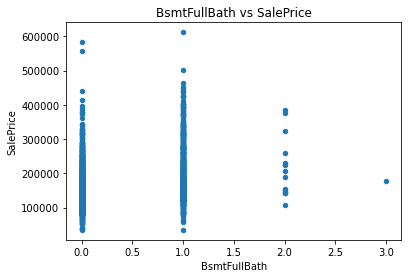

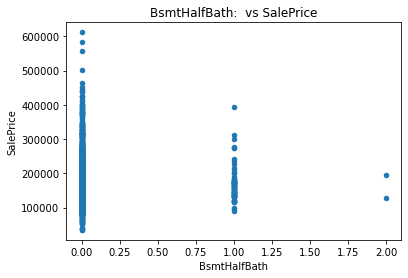

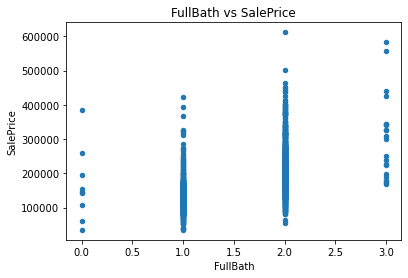

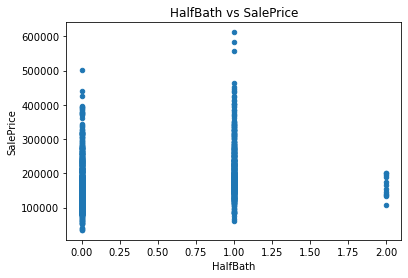

In [12]:
#Analizando cantidad de baños

trainset.plot.scatter(x="BsmtFullBath", y="SalePrice", title = "BsmtFullBath vs SalePrice")
trainset.plot.scatter(x="BsmtHalfBath", y="SalePrice", title ="BsmtHalfBath:  vs SalePrice")

trainset.plot.scatter(x="FullBath", y="SalePrice", title ="FullBath vs SalePrice")
trainset.plot.scatter(x="HalfBath", y="SalePrice", title ="HalfBath vs SalePrice")